# Assignment 1 - CIC-1205

## Exercise 1 - Loans payment prediction

Student: Balthazar Paixão

Link to the video: ...


## Code


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Defining the column names
colnames = [
    "ESCT",
    "NDEP",
    "RENDA",
    "TIPOR",
    "VBEM",
    "NPARC",
    "VPARC",
    "TEL",
    "IDADE",
    "RESMS",
    "ENTRADA",
    "CLASSE",
]

df_credtrain = pd.read_csv(
    "../class-repo/cic1205/data/credtrain.txt", sep="\t", header=None, names=colnames
)
df_credtest = pd.read_csv(
    "../class-repo/cic1205/data/credtest.txt", sep="\t", header=None, names=colnames
)

In [3]:
# Analyzing the dimensions of the dataframes
print(df_credtrain.shape, df_credtest.shape)

(1500, 12) (577, 12)


In [4]:
df_credtrain.sample(3)

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
219,1,0,1200,0,598,9,99,0,45,0,0,1
325,1,0,1500,1,457,2,248,0,36,48,0,0
1363,0,0,360,0,460,10,70,0,29,0,0,1


### Categorical Features Transformation

The variable ESCT (Civil Status) is categorical, and can assume 4 different values (each value corresponds to a civil status). Note that there is no defined order on these values. For comparison, consider the variable NDEP (which corresponds to the number of dependents of the client).

The presence of categorical variables in a training set can make it difficult to generate the classification model. This is because most learning algorithms (including neural networks) assume the existence of a total order on the values of a variable. To mitigate this problem, an alternative is to transform the ESCT variable into several dummy variables (binary variable). A dummy variable is a binary variable used to represent categories. Thus, the ESCT variable will be transformed into 4 "dummy variants", where the value 1 will correspond to the occurrence of a certain category and the value 0 will correspond to the non-occurrence.


In [6]:
df_credtrain = pd.get_dummies(
    data=df_credtrain, prefix="ESCT", columns=["ESCT"], drop_first=True
)
df_credtest = pd.get_dummies(
    data=df_credtest, prefix="ESCT", columns=["ESCT"], drop_first=True
)

df_credtrain.sample(3)

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
901,0,400,0,333,4,98,0,54,96,0,1,False,False,False
983,0,609,0,830,10,126,0,30,0,0,1,False,False,False
1222,0,1548,1,339,6,73,0,63,6,0,0,False,False,False


In [7]:
# separating the categorical and numerical features in order to apply the scaling and encoder
categorical_features = ["ESCT_1", "ESCT_2", "ESCT_3", "NDEP", "TEL", "TIPOR"]
numerical_features = ["RENDA", "VBEM", "NPARC",
                      "VPARC", "IDADE", "RESMS", "ENTRADA"]


X_train_categories = df_credtrain[categorical_features]
X_train_categories = np.array(X_train_categories).astype(float)
X_train_numerical = df_credtrain[numerical_features]
X_train_numerical = np.array(X_train_numerical).astype(float)
y_train = df_credtrain["CLASSE"]

X_test_categories = df_credtest[categorical_features]
X_test_categories = np.array(X_test_categories).astype(float)
X_test_numerical = df_credtest[numerical_features]
X_test_numerical = np.array(X_test_numerical).astype(float)
y_test = df_credtest["CLASSE"]

### Numerical Feature Scaling

Before training the model, it is also necessary to perform the _normalization_ of the characteristics in order to avoid eventual problems due to the discrepancy in the orders of magnitude of the features.


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

X_train_numerical = scaler.fit_transform(X_train_numerical)
X_test_numerical = scaler.transform(X_test_numerical)

X_train = np.concatenate((X_train_categories, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_categories, X_test_numerical), axis=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1500, 13) (577, 13) (1500,) (577,)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

## Model validation

The metrics for validation that we use here are as follows:

- The recall means "how many of this class you find over the whole number of element of this class"

- The precision will be "how many are correctly classified among that class"

- The f1-score is the harmonic mean between precision & recall

- The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.)

##### [In an example](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)

```text
We can picture how Precision and Recall as netting a drove of fishes.

Imaging, we boating over the sea and lay down our net.

If the drove of fishes is huge, while the net is pretty small -> We will see fishes in very positions in the net, means Precision is high. But we only get a minority of the drove, means Recall is low.

Meanwhile, there is just a tiny drove of fishes, but we got a huge net -> We will see that just a tiny part of the net have fishes, means Precision is low. But fortunately, we catch every fish in the drove, means Recall is high.
```

#### Confusion Matrix

The confusion matrix helps us to see the proportion between errors and hits. The labels "0" and "1" in the lower "margin" of the matrix are the predicted values in each case. Similarly, the labels on the left margin indicate the correct answer.

The main diagonal, which is colored in shades of purple, indicates the percentage of correct predictions for each class.

The lighter diagonal indicates the percentage of errors for each class.

We can see that the hit percentages for each class are higher in relation to the error percentages. This is an indication that the model parameters were correctly adjusted during learning.


CLASSIFICATION REPORT - LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.93      0.82      0.87       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.89      0.89      0.89       577



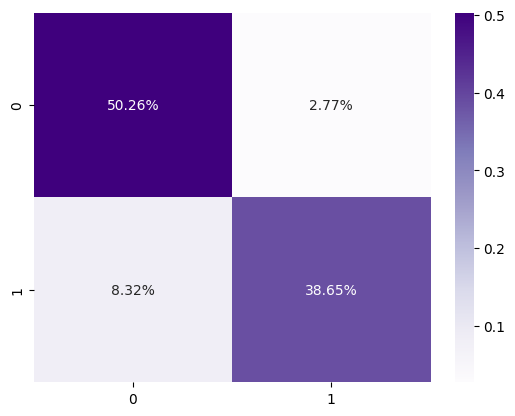

In [16]:
target_names = ["0", "1"]

y_pred_LR = LR.predict(X_test)
print("CLASSIFICATION REPORT - LOGISTIC REGRESSION")
print(classification_report(y_test, y_pred_LR, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Purples")
plt.show()

CLASSIFICATION REPORT - DECISION TREE
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       306
           1       0.85      0.87      0.86       271

    accuracy                           0.86       577
   macro avg       0.86      0.87      0.86       577
weighted avg       0.87      0.86      0.86       577



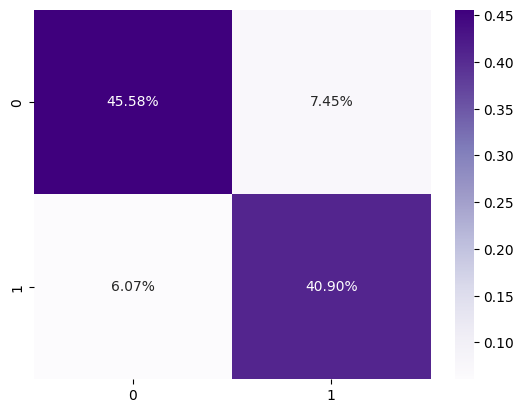

In [17]:
y_pred_DT = DT.predict(X_test)
print("CLASSIFICATION REPORT - DECISION TREE")
print(classification_report(y_test, y_pred_DT, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Purples")
plt.show()

CLASSIFICATION REPORT - RANDOM FOREST
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.94      0.82      0.88       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.89      0.89       577



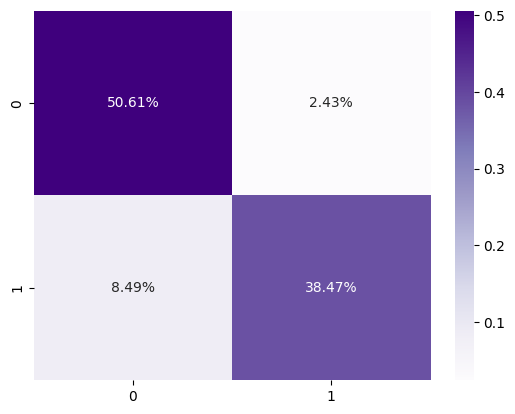

In [18]:
y_pred_RF = RF.predict(X_test)
print("CLASSIFICATION REPORT - RANDOM FOREST")
print(classification_report(y_test, y_pred_RF, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Purples")
plt.show()

CLASSIFICATION REPORT - KNN
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       306
           1       0.87      0.80      0.83       271

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577



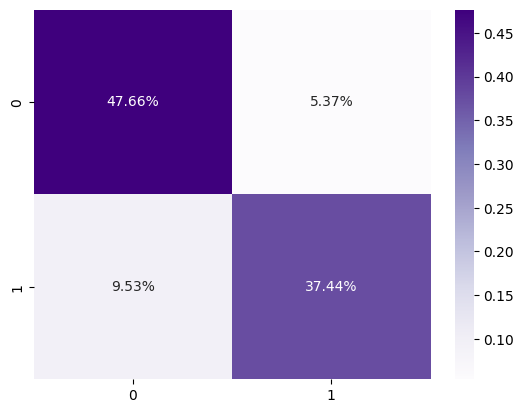

In [19]:
y_pred_KNN = KNN.predict(X_test)
print("CLASSIFICATION REPORT - KNN")
print(classification_report(y_test, y_pred_KNN, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Purples")
plt.show()

CLASSIFICATION REPORT - GRADIENT BOOSTING
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       306
           1       0.96      0.83      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



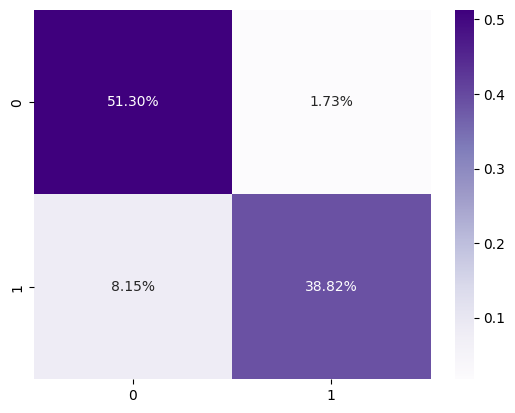

In [20]:
y_pred_GB = GB.predict(X_test)
print("CLASSIFICATION REPORT - GRADIENT BOOSTING")
print(classification_report(y_test, y_pred_GB, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Purples")
plt.show()